In [34]:
import numpy as np
import sys
sys.path.append("../model")
from rnn_FORCE import RNN
import matplotlib.pyplot as plt
import torch
from torch import nn
import seaborn as sns
SAVEFIG = True

### Exercise 1: No Feedback Connection, Auto Network

To replicate exercise 1: N = 1000, with self connection, tanh, timestep = 0.1. g = 0.5, state converge to 0; g = 1, state converge to non-zero; g = 1.5, state diverge.

N = 1000 is important, if N = 100, it will converge when g = 1.5.

Without self connection, it will converge when g = 1.5. But g = 2 could make it diverge.

And tanh is also very important. With sigmoid, to diverge, g needs to be very large, like 10.

With 2 * sigmoid - 1, it can diverge with g = 5.

With Dale's law, need g = 3 to diverge. Not stable.

In [54]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)  # change this would affect

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) * 0
init_state = np.zeros((num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

In [55]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = [1]*excite_num + [-1]*(num_nodes-excite_num)
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

In [56]:
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=5, activation_func=nn.Tanh())
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=4)
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh(), output_nonlinearity=lambda x: x)

In [57]:
network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
states, activations, outputs = network.simulate(120)

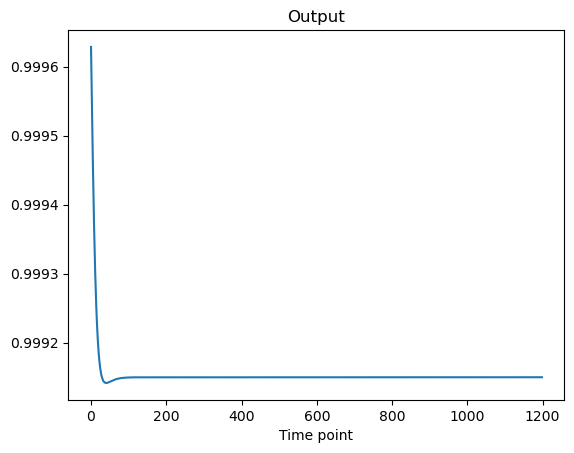

In [58]:
plt.plot(outputs)
plt.title("Output")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_output.png")

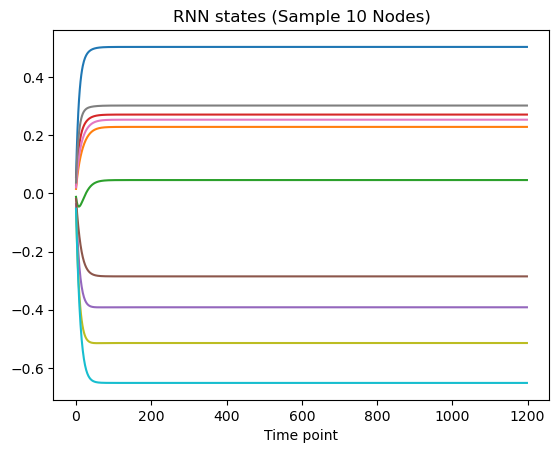

In [59]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])
plt.title("RNN states (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_states.png")

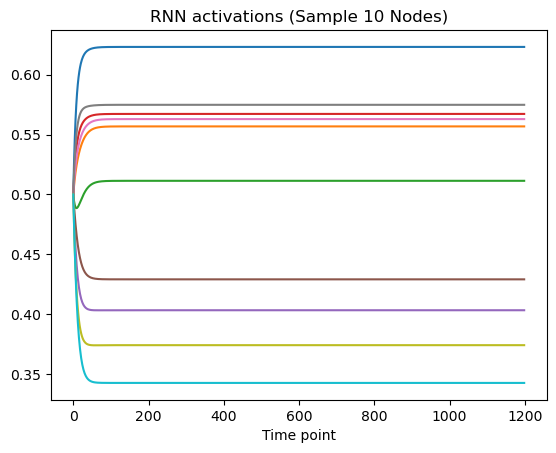

In [60]:
all_activations = np.concatenate(activations, axis=1)
for i in range(10):
    plt.plot(all_activations[i, :])
plt.title("RNN activations (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_activations.png")

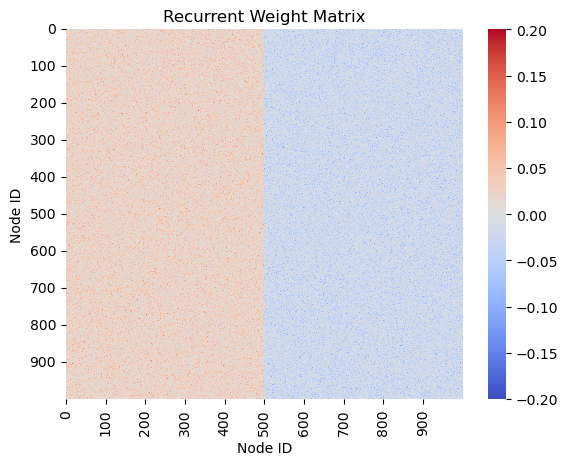

In [61]:
sns.heatmap(weight_matrix, vmax=0.2, vmin=-0.2, cmap="coolwarm")
plt.xlabel("Node ID")
plt.ylabel("Node ID")
plt.xticks(np.arange(0, 1000, 100), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 1000, 100), np.arange(0, 1000, 100))
plt.title("Recurrent Weight Matrix")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_rcweight.png")

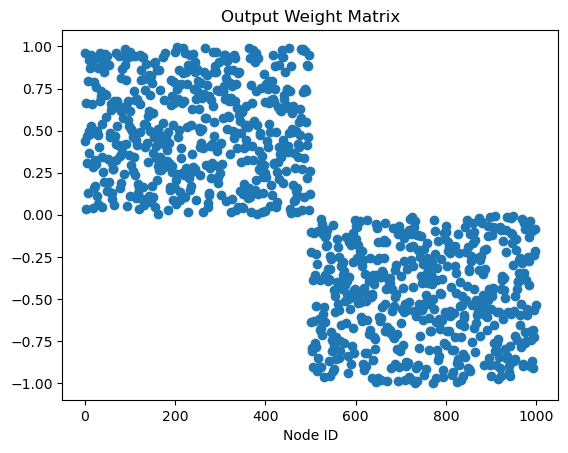

In [62]:
plt.plot(output_weight_matrix.flatten(),'o')
plt.xlabel("Node ID")
plt.title("Output Weight Matrix")
if SAVEFIG:
    plt.savefig("fig/FORCE_nofb_outweight.png")

### Exercise 2: Feedback Target

To replicate exercise 2: set target = targets.

Multiply 0.5 to feedback_weight_matrix would make it chaotic.

With Dale's law, harder to chaotic.

In [63]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(6000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [64]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = [1]*excite_num + [-1]*(num_nodes-excite_num)
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

In [65]:
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#               timestep=0.1, g=1.5, activation_func=nn.Tanh(), output_nonlinearity=lambda x: x, target=targets)
network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
states, activations, outputs = network.simulate(120)

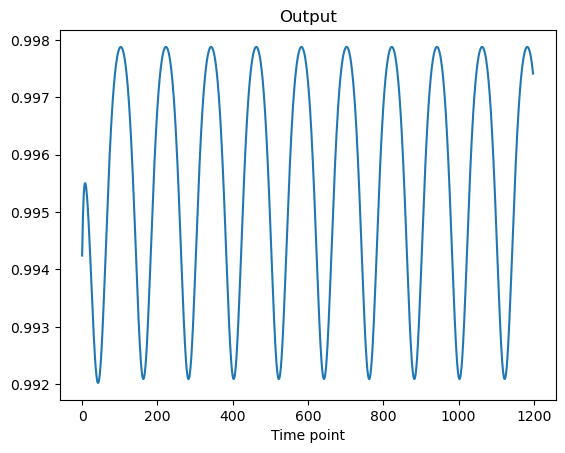

In [66]:
plt.plot(outputs)
plt.title("Output")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_fbtarget_output.png")

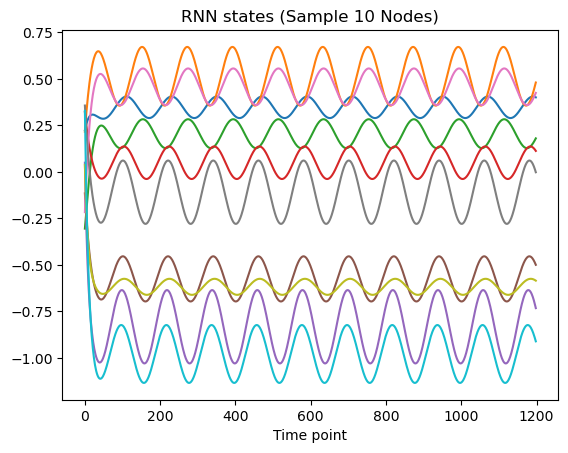

In [67]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])
plt.title("RNN states (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_fbtarget_states.png")

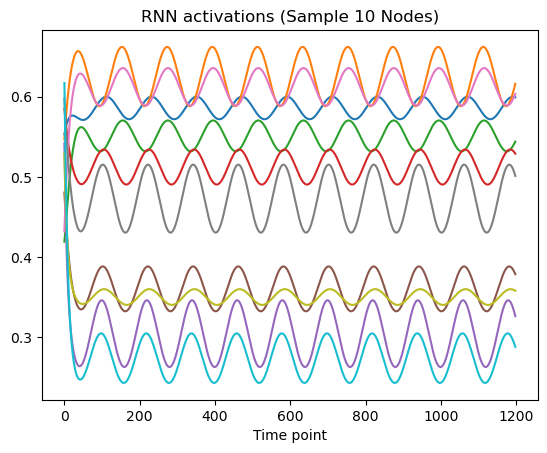

In [68]:
all_activations = np.concatenate(activations, axis=1)
for i in range(10):
    plt.plot(all_activations[i, :])
plt.title("RNN activations (Sample 10 Nodes)")
plt.xlabel("Time point")
if SAVEFIG:
    plt.savefig("fig/FORCE_fbtarget_activations.png")

### Test Hebbian Learning Based On Feedback Target

In [14]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(6000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [15]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [16]:
# simulation data
has_hebbian = True
hebbian_lr = 0.003
ext_weight_sum = 250
inh_weight_sum = 250
outputs, states, activations, output_weights = [], [], [], []
for i in time_points:
    
    # Creating RNN
    network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
              timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    network.i = i
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # prepare for hebbian learning
    this_target = targets[i].item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_target * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    outputs.append(this_output.detach().item())
    states.append(init_state)
    activations.append(this_activation)
    output_weights.append(this_output_weight_matrix)

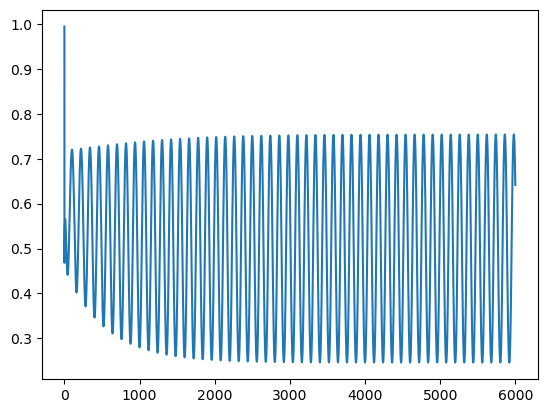

In [17]:
plt.plot(outputs)

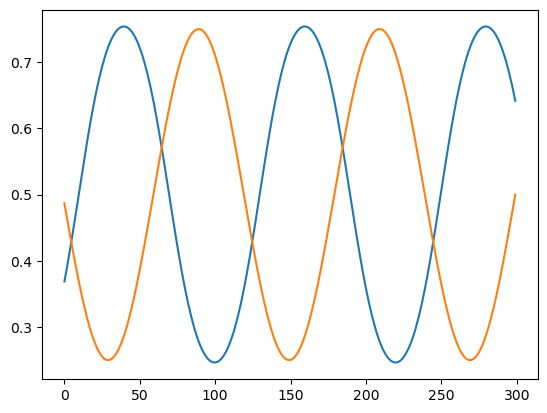

In [18]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

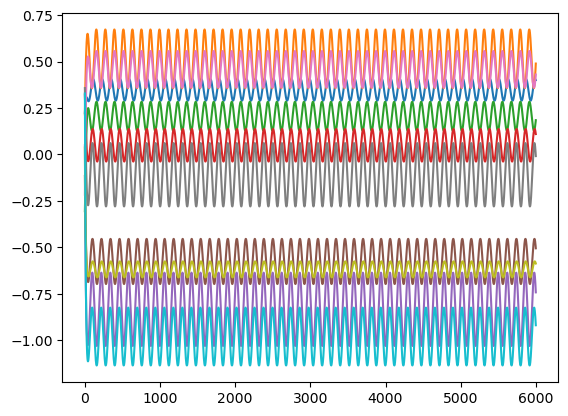

In [19]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

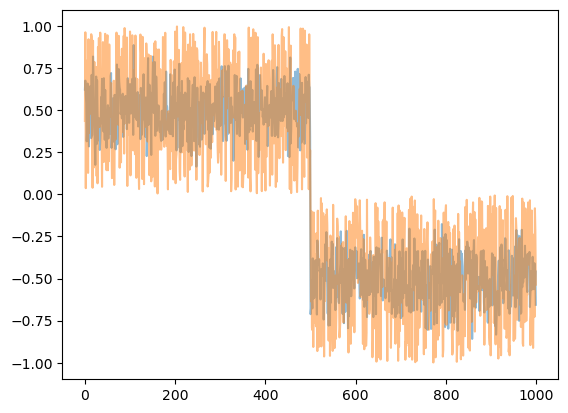

In [20]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

In [21]:
output_weights[-1].flatten()

array([ 0.6229508 ,  0.6753219 ,  0.5917247 ,  0.5422308 ,  0.31505445,
        0.37841955,  0.6580282 ,  0.49558377,  0.37186986,  0.28480604,
        0.41023588,  0.5054662 ,  0.6429179 ,  0.5604909 ,  0.33435223,
        0.7095377 ,  0.34985325,  0.46762818,  0.8185058 ,  0.7136961 ,
        0.5566242 ,  0.4620083 ,  0.29484642,  0.17537415,  0.36717662,
        0.6996676 ,  0.2984211 ,  0.6772291 ,  0.48191273,  0.39360866,
        0.32100374,  0.4528346 ,  0.43169203,  0.26372874,  0.31599167,
        0.3960317 ,  0.5770458 ,  0.5416947 ,  0.68647355,  0.42013088,
        0.53924996,  0.3738835 ,  0.6897069 ,  0.54807025,  0.32432044,
        0.61984885,  0.44092524,  0.34929633,  0.27587023,  0.42943624,
        0.4652011 ,  0.52949786,  0.33149928,  0.48378655,  0.51328677,
        0.41845837,  0.35956407,  0.70324695,  0.72032624,  0.27581   ,
        0.3544031 ,  0.40245113,  0.5696098 ,  0.31294674,  0.4508496 ,
        0.3959372 ,  0.5908652 ,  0.48347187,  0.26754478,  0.47

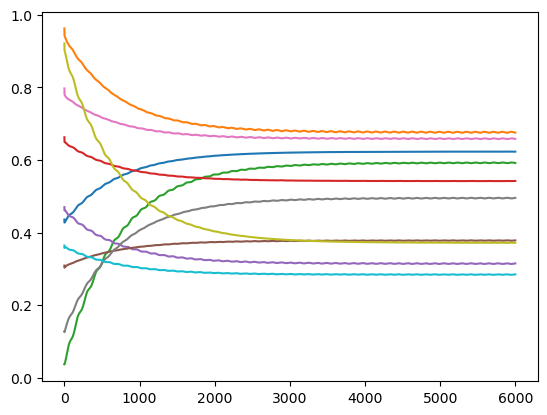

In [22]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

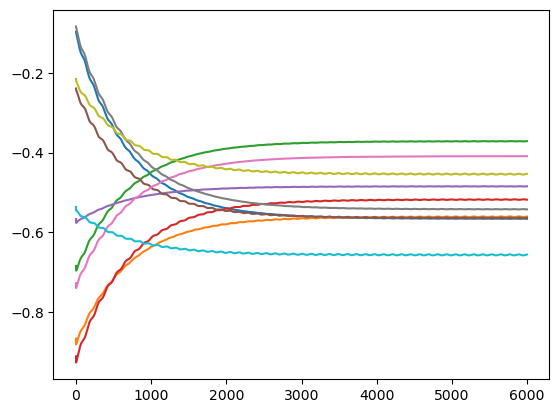

In [23]:
for i in range(990, 1000):
    plt.plot(all_output_weights[i, :])

### FORCE Learning On Gains

In [210]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
# output_weight_matrix = right_output_weight_matrix
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(1200)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [211]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [212]:
# training
has_backprop = True
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()

In [213]:
# simulation data - every period
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes = [], []
for i in time_points:

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

        # Creating RNN
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
        # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.01)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
    # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state)
    output_weights.append(this_output_weight_matrix)
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)

In [189]:
network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
states, activations, outputs = network.simulate(120)

In [167]:
# # simulation data - every points
# losses, outputs, states, output_weights = [], [], [], []
# gain_changes, shift_changes = [], []
# for i in time_points:
    
#     # Creating RNN
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
#     # network.i = i
#     network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#               timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
#     opt = torch.optim.SGD([network.gain, network.shift], lr=0.01)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     init_state = network.state.detach().numpy()
#     this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # backprop
#     if has_backprop:
#         loss_val.backward()
#         opt.step()
#         # opt.zero_grad()
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(init_state)
#     output_weights.append(this_output_weight_matrix)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

In [168]:
# # training - random update points
# has_backprop = True
# loss_func = nn.MSELoss()
# time_points = np.arange(600)
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
# theo_gain = init_gain.copy()
# theo_shift = init_shift.copy()
# last_gain = init_gain.copy()
# last_shift = init_shift.copy()
# update_points = np.random.choice(time_points, 100, replace=False)

# # simulation data
# losses, outputs, states = [], [], []
# gain_changes, shift_changes = [], []

# # Creating RNN
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
# opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)

# for i in time_points:
    
#     if i in update_points:
#         # backprop
#         loss_val.backward()
#         opt.step()
#         # re-create RNN
#         network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
#         opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     this_state = network.state.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # save gains and shifts
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(this_state)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

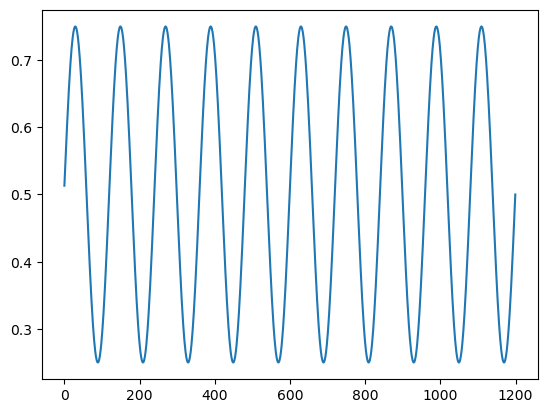

In [214]:
plt.plot(targets)

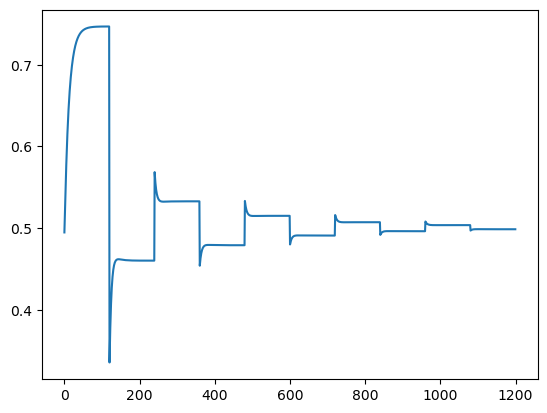

In [215]:
plt.plot(outputs)

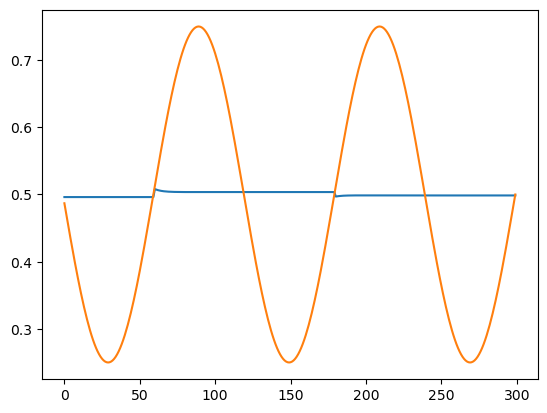

In [216]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

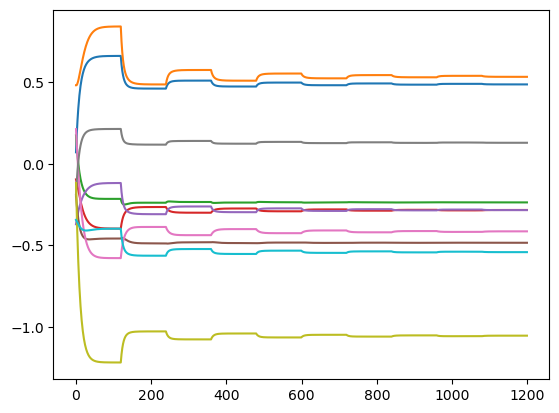

In [217]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

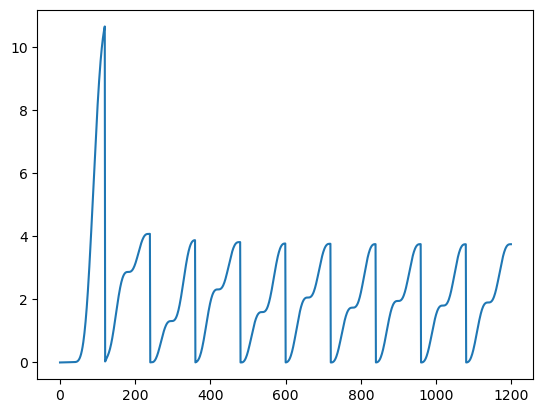

In [218]:
plt.plot(losses)

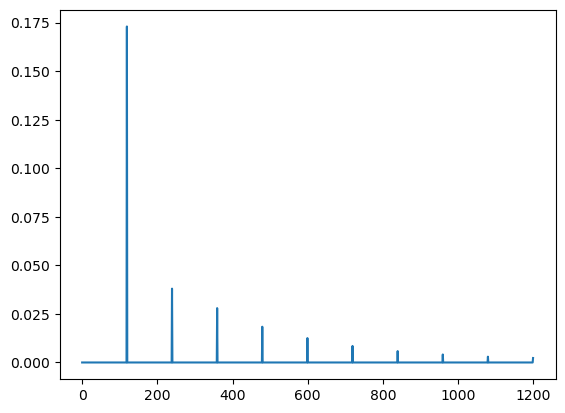

In [219]:
plt.plot(gain_changes)

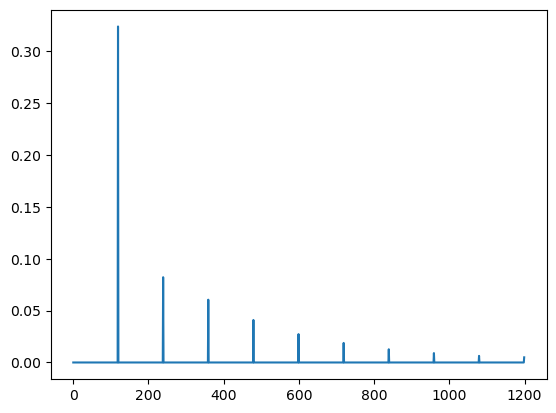

In [220]:
plt.plot(shift_changes)

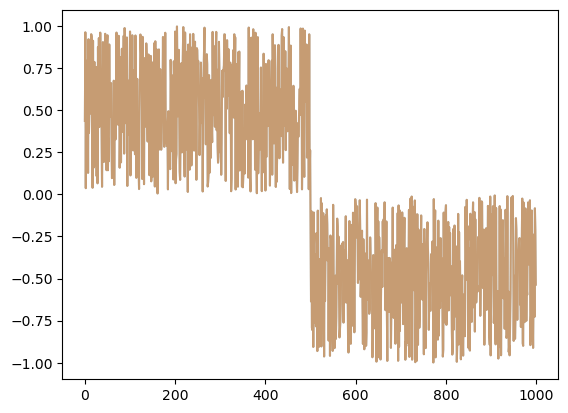

In [161]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

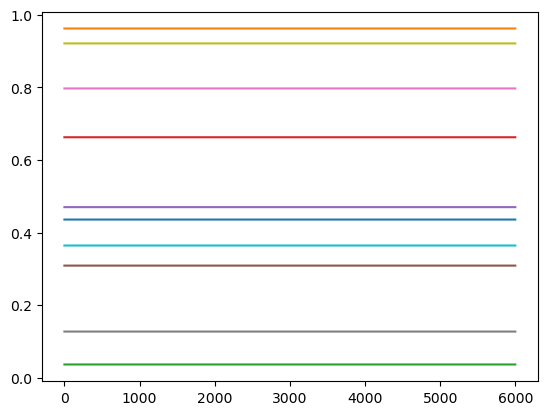

In [162]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

### Force Learning On Gains With Target

In [342]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
t = 1200000
time_points = np.arange(t)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [343]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [344]:
# training
has_backprop = True
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()

In [345]:
# simulation data - every period
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes = [], []
for i in time_points:

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

        # Creating RNN
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
        # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
        # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
        #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.005)
        # opt = torch.optim.Adam([network.gain, network.shift], lr=0.001)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
    # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state[0:15,:])
    # output_weights.append(this_output_weight_matrix)
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)

In [ ]:
# # simulation data - every points
# losses, outputs, states, output_weights = [], [], [], []
# gain_changes, shift_changes = [], []
# for i in time_points:
    
#     # Creating RNN
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
#     # network.i = i
#     network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#               timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
#     # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
#     #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
#     opt = torch.optim.SGD([network.gain, network.shift], lr=0.01)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     init_state = network.state.detach().numpy()
#     this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # backprop
#     if has_backprop:
#         loss_val.backward()
#         opt.step()
#         # opt.zero_grad()
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(init_state)
#     output_weights.append(this_output_weight_matrix)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

In [ ]:
# # training - random update points
# has_backprop = True
# loss_func = nn.MSELoss()
# time_points = np.arange(600)
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
# theo_gain = init_gain.copy()
# theo_shift = init_shift.copy()
# last_gain = init_gain.copy()
# last_shift = init_shift.copy()
# update_points = np.random.choice(time_points, 100, replace=False)

# # simulation data
# losses, outputs, states = [], [], []
# gain_changes, shift_changes = [], []

# # Creating RNN
# network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
# opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)

# for i in time_points:
    
#     if i in update_points:
#         # backprop
#         loss_val.backward()
#         opt.step()
#         # re-create RNN
#         network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, timestep=0.1, g=1.5, activation_func=nn.Tanh())
#         opt = torch.optim.SGD([network.gain, network.shift], lr=0.02)
    
#     # forward
#     network.forward()
#     this_output = network.output.squeeze()
#     this_state = network.state.detach().numpy()

#     # get loss
#     this_target = torch.tensor(targets[i].item())
#     loss_val = loss_func(this_output, this_target)

#     # save gains and shifts
#     init_gain = network.gain.detach().numpy()
#     init_shift = network.shift.detach().numpy()
#     # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
#     # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
#     gain_change = np.linalg.norm(init_gain - last_gain, 2)
#     shift_change = np.linalg.norm(init_shift - last_shift, 2)
#     last_gain = init_gain.copy()
#     last_shift = init_shift.copy()

#     # save
#     losses.append(loss_val.detach().item())
#     outputs.append(this_output.detach().item())
#     states.append(this_state)
#     gain_changes.append(gain_change)
#     shift_changes.append(shift_change)

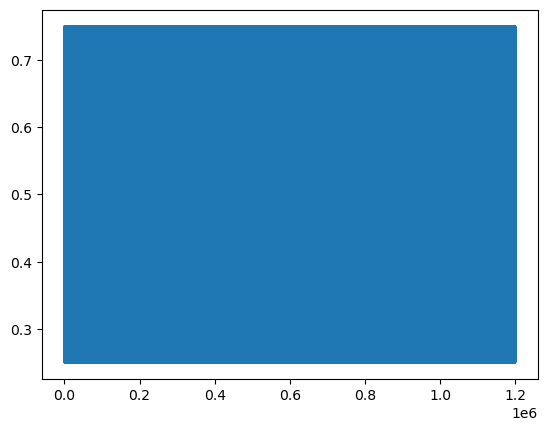

In [346]:
plt.plot(targets)

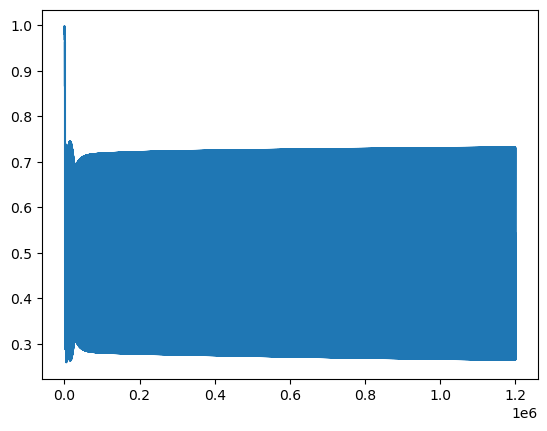

In [347]:
plt.plot(outputs)

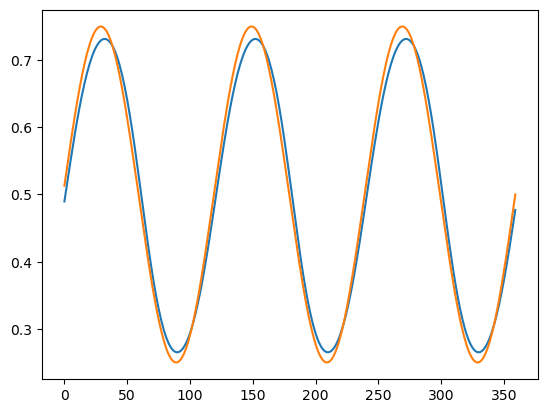

In [348]:
plt.plot(outputs[-360:])
plt.plot(targets[-360:])

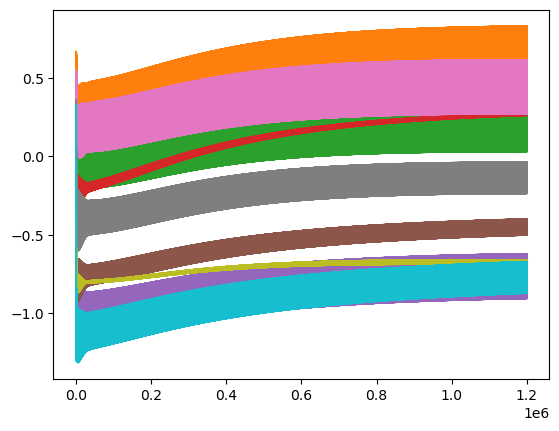

In [349]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

(0.0, 1.0)

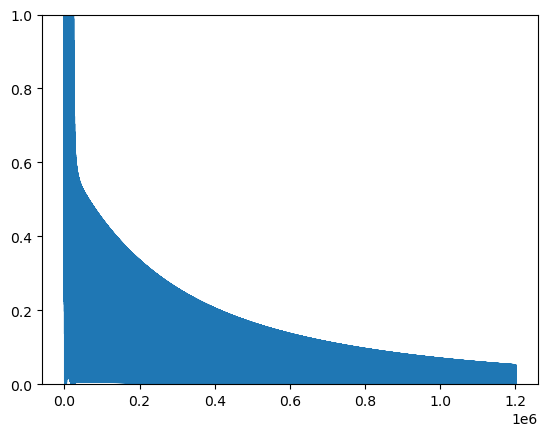

In [350]:
plt.plot(losses)
plt.ylim([0, 1])

(0.0, 0.005)

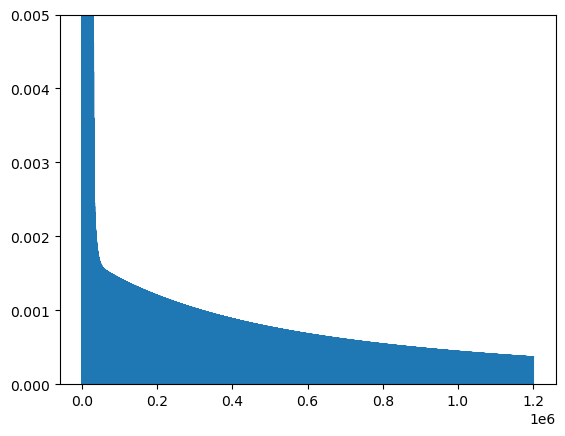

In [351]:
plt.plot(gain_changes)
plt.ylim([0, 0.005])

(0.0, 0.005)

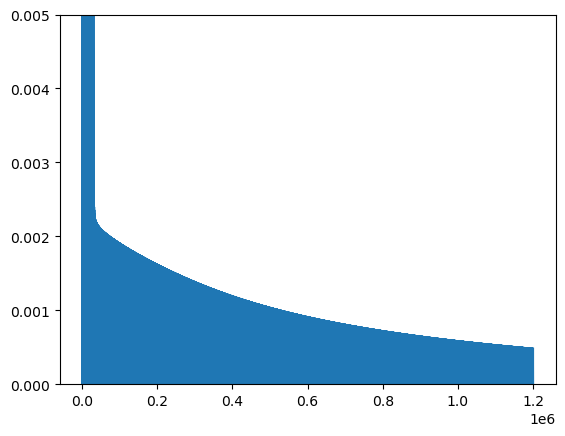

In [352]:
plt.plot(shift_changes)
plt.ylim([0, 0.005])

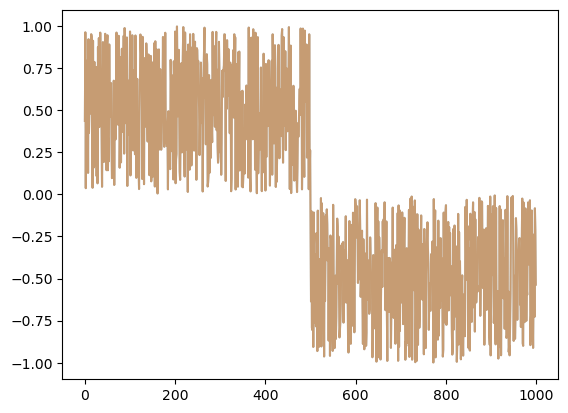

In [232]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

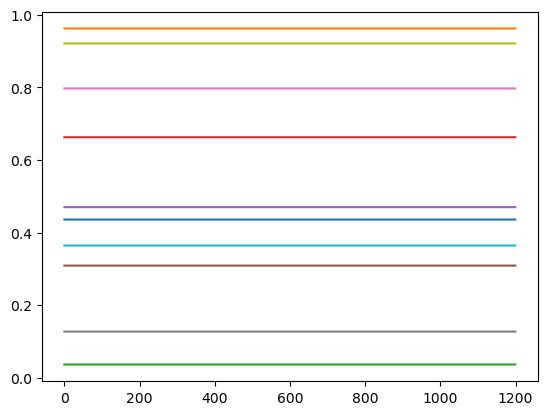

In [233]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

### FORCE Learning On Gains Plus Hebbian Learning

In [353]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(120000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [354]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type
init_output_weight_matrix = output_weight_matrix.copy()

In [208]:
# training
has_backprop = True
has_hebbian = False
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()
hebbian_lr = 0.003
ext_weight_sum = 250
inh_weight_sum = 250

In [209]:
# simulation data
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes = [], []
for i in time_points:
    
    if len(losses) > 0 and losses[-1] < 0.01:
        has_hebbian = True
    
    # Creating RNN
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    # network.i = i
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15)
    network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
              timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=4)
    opt = torch.optim.SGD([network.gain, network.shift], lr=0.002)
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val = loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        # opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    # gain_change = np.linalg.norm(init_gain - theo_gain, 2)
    # shift_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # prepare for hebbian learning
    this_output_val = this_output.detach().item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_output_val * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state)
    output_weights.append(this_output_weight_matrix)
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)

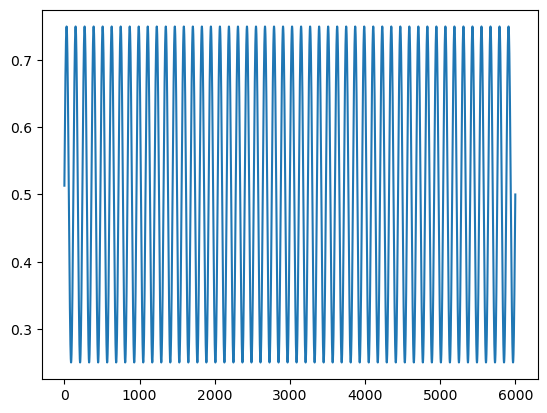

In [196]:
plt.plot(targets)

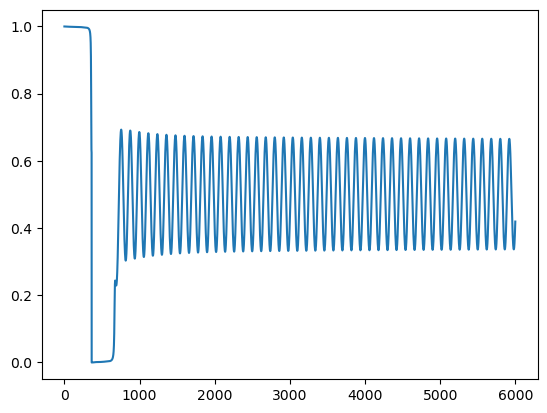

In [197]:
plt.plot(outputs)

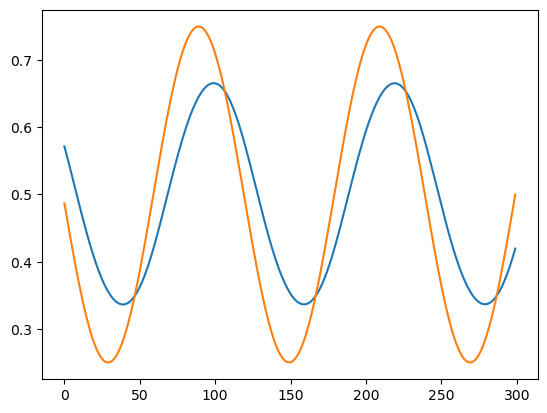

In [198]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

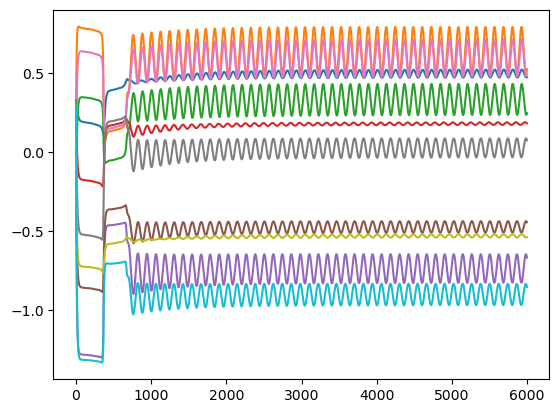

In [199]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

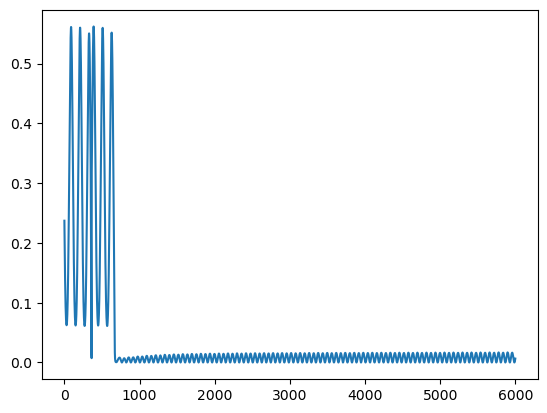

In [200]:
plt.plot(losses)

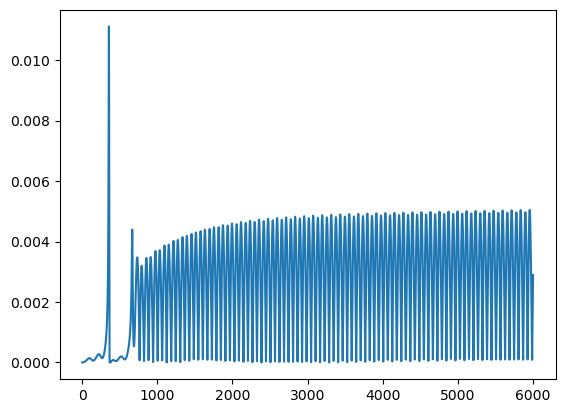

In [201]:
plt.plot(gain_changes)

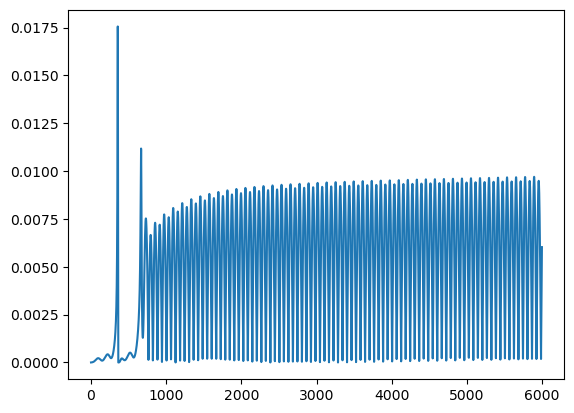

In [202]:
plt.plot(shift_changes)

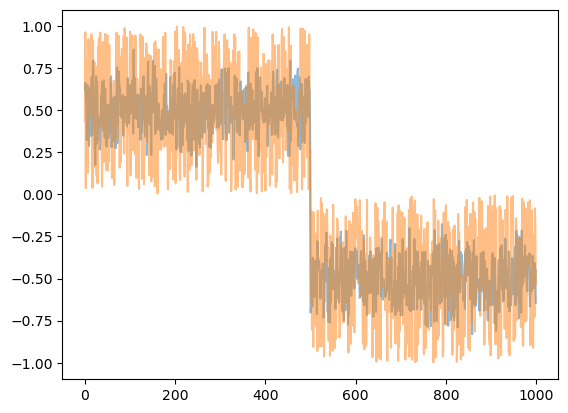

In [203]:
plt.plot(output_weights[-1].flatten(), alpha=0.5)
plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

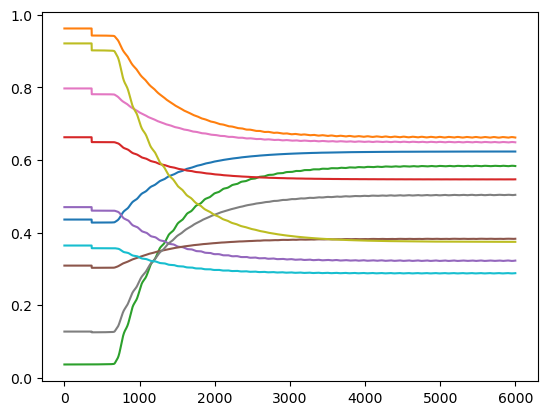

In [148]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

In [204]:
output_weights[-1].flatten()

array([ 0.62333167,  0.6619626 ,  0.5834151 ,  0.5467507 ,  0.32282975,
        0.383002  ,  0.6487672 ,  0.5040259 ,  0.37450367,  0.2882198 ,
        0.40933383,  0.5215828 ,  0.63241524,  0.5596649 ,  0.34621963,
        0.6953927 ,  0.3561361 ,  0.4707052 ,  0.7959658 ,  0.6957607 ,
        0.5520571 ,  0.47430822,  0.29976866,  0.17465414,  0.38007334,
        0.6997126 ,  0.30040994,  0.6691867 ,  0.47908172,  0.40595585,
        0.3284868 ,  0.45809194,  0.4424992 ,  0.2669364 ,  0.3217693 ,
        0.4073747 ,  0.5845129 ,  0.54309785,  0.66898066,  0.4208898 ,
        0.5317812 ,  0.37850383,  0.67597324,  0.53266203,  0.3360667 ,
        0.62661374,  0.4521991 ,  0.3560794 ,  0.28287888,  0.44221592,
        0.4684023 ,  0.53349715,  0.33498096,  0.49668208,  0.5272896 ,
        0.42057043,  0.35962114,  0.6880692 ,  0.7009816 ,  0.27976054,
        0.35369074,  0.4135541 ,  0.57098156,  0.31653583,  0.45996234,
        0.39217547,  0.580701  ,  0.49152488,  0.2740001 ,  0.47

In [205]:
right_output_weight_matrix = output_weights[-1].copy()

### FORCE Learning On Gains with Target Plus Hebbian Learning

In [73]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(1200000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [91]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

# normalize
ext_weight_sum = 250
inh_weight_sum = 250
tmp_output_weight_matrix = output_weight_matrix.copy()
tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
output_weight_matrix = tmp_output_weight_matrix.copy()
init_output_weight_matrix = output_weight_matrix.copy()

In [92]:
# training
has_backprop = True
has_hebbian = False
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()
max_hebbian_lr = 0.003
hebbian_lr_update = max_hebbian_lr / 30000
hebbian_lr = 0


In [93]:
# simulation data
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes, gain_theo_changes, shift_theo_changes = [], [], [], []

for i in time_points:

    if i > 800000:
        has_hebbian = True
    
    if has_hebbian and hebbian_lr < max_hebbian_lr:
        hebbian_lr += hebbian_lr_update

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

    # Creating RNN
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.005)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        # opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    gain_theo_change = np.linalg.norm(init_gain - theo_gain, 2)
    shift_theo_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # prepare for hebbian learning
    this_output_val = this_output.detach().item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_output_val * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state[0:15,:])
    output_weights.append(this_output_weight_matrix[:,0:15])
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)
    gain_theo_changes.append(gain_theo_change)
    shift_theo_changes.append(shift_theo_change)

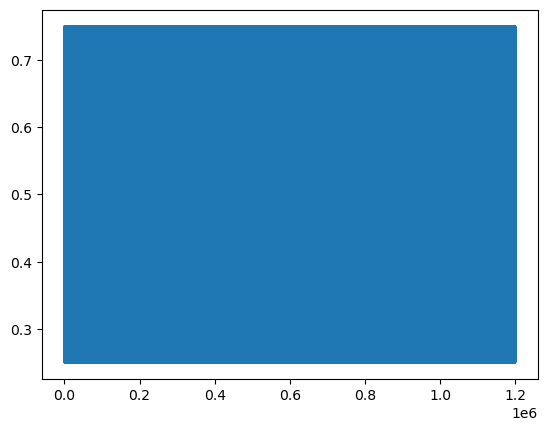

In [94]:
plt.plot(targets)

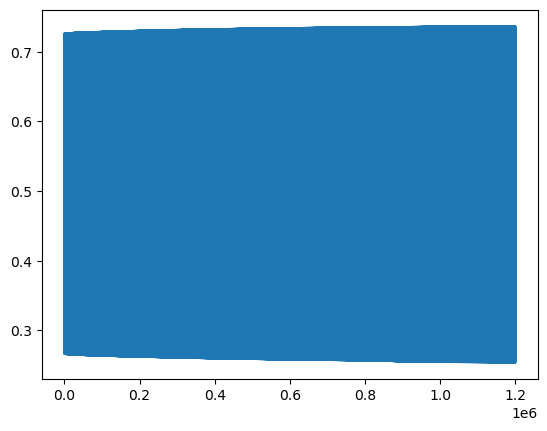

In [95]:
plt.plot(outputs)

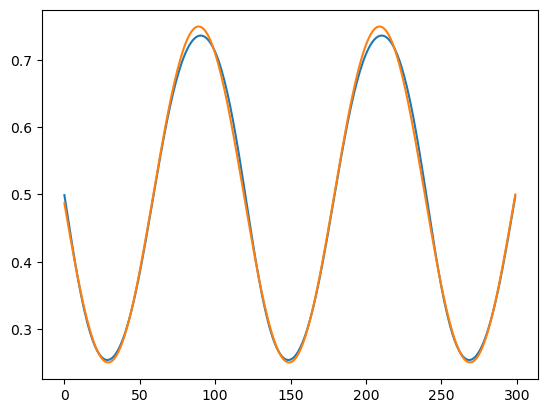

In [96]:
plt.plot(outputs[-300:])
plt.plot(targets[-300:])

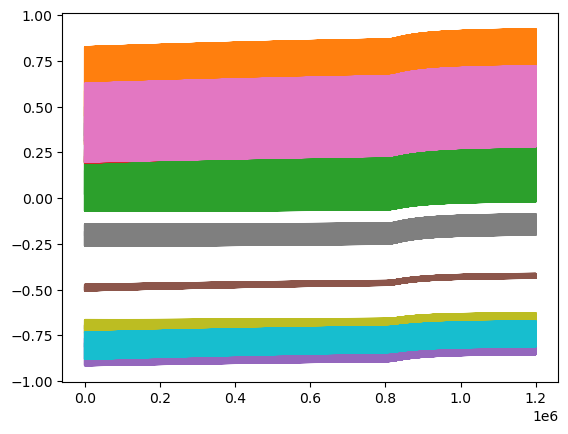

In [103]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

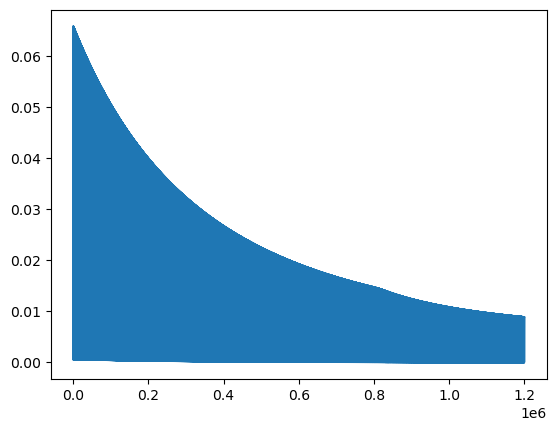

In [98]:
plt.plot(losses)

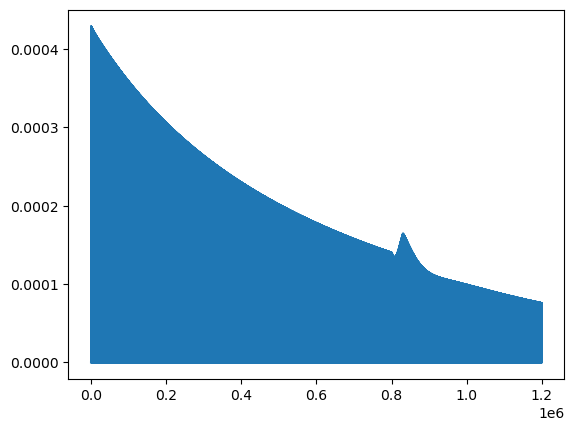

In [99]:
plt.plot(gain_changes)

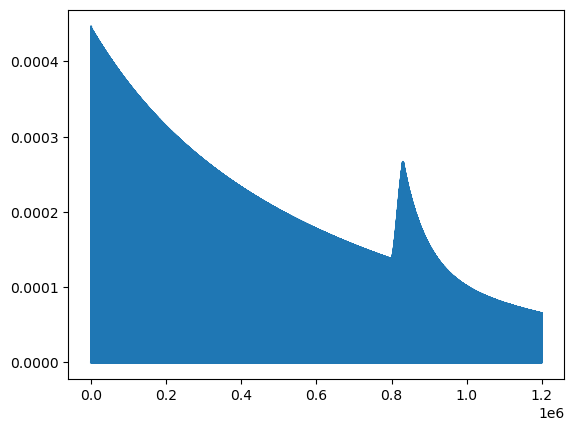

In [100]:
plt.plot(shift_changes)

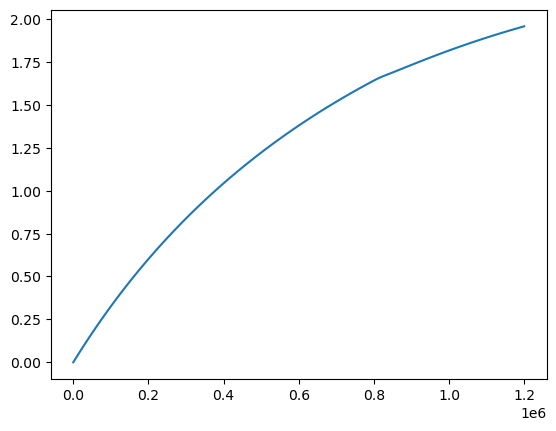

In [101]:
plt.plot(gain_theo_changes)

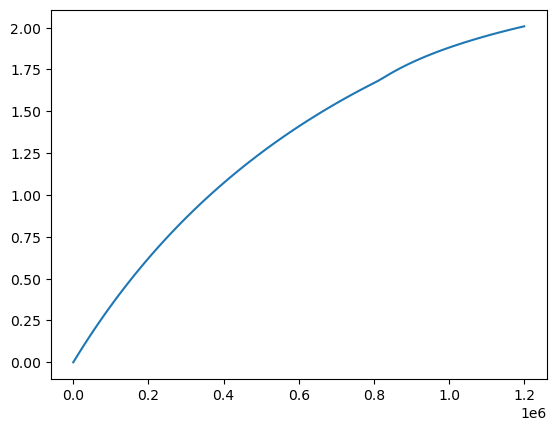

In [102]:
plt.plot(shift_theo_changes)

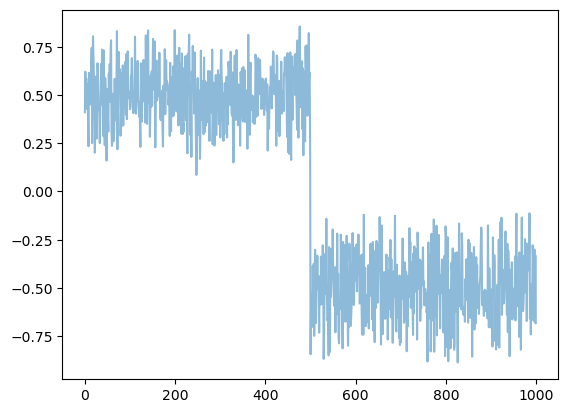

In [109]:
plt.plot(this_output_weight_matrix.flatten(), alpha=0.5)
# plt.plot(init_output_weight_matrix.flatten(), alpha=0.5)

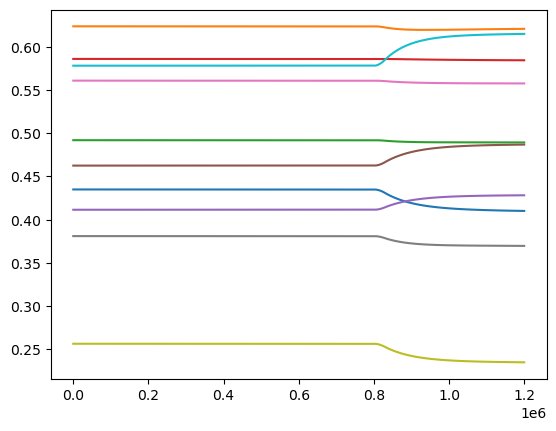

In [106]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

In [107]:
network = RNN(weight_matrix, connectivity_matrix, init_state, theo_gain, theo_shift, this_output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
states, activations, outputs = network.simulate(120)

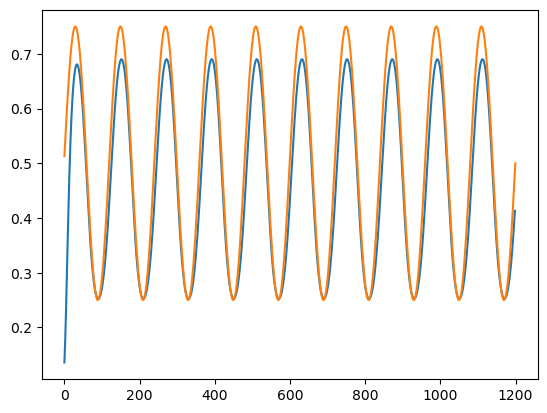

In [108]:
plt.plot(np.array(outputs)+0.09)
plt.plot(targets[0:1200])

In [134]:
# Initializing matrix
num_nodes = 1000
np.random.seed(2)

connectivity_matrix = np.ones((num_nodes, num_nodes))
weight_matrix = np.random.normal(0, 1/np.sqrt(num_nodes), (num_nodes, num_nodes))
for i in range(num_nodes):
    weight_matrix[i, i] = 0
    connectivity_matrix[i, i] = 0
output_weight_matrix = np.random.uniform(-1, 1, (1, num_nodes))
feedback_weight_matrix = np.random.uniform(-1, 1, (num_nodes, 1)) # * 0.5
init_state = np.random.uniform(-0.5, 0.5, (num_nodes, 1))
init_gain = np.ones((num_nodes, 1))
init_shift = np.zeros((num_nodes, 1))

# define targets
time_points = np.arange(1500000)
targets = (np.sin((time_points+1)/60*np.pi))/4 + 0.5

In [135]:
# Dale's Law
excite_perc = 0.5
excite_num = int(excite_perc*num_nodes)
node_type = np.array([1]*excite_num + [-1]*(num_nodes-excite_num))
weight_type = np.tile(node_type, num_nodes).reshape(num_nodes, -1)

# Enforce Dale's Law
weight_matrix = np.abs(weight_matrix) * weight_type
output_weight_matrix = np.abs(output_weight_matrix) * node_type

# normalize
ext_weight_sum = 250
inh_weight_sum = 250
# tmp_output_weight_matrix = output_weight_matrix.copy()
# tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
# tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
# tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
# tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
# tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
# tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
# output_weight_matrix = tmp_output_weight_matrix.copy()
init_output_weight_matrix = output_weight_matrix.copy()

In [136]:
# training
has_backprop = True
has_hebbian = False
loss_func = nn.MSELoss()
theo_gain = init_gain.copy()
theo_shift = init_shift.copy()
last_gain = init_gain.copy()
last_shift = init_shift.copy()
max_hebbian_lr = 0.003
hebbian_lr_update = max_hebbian_lr / 30000
hebbian_lr = 0


In [137]:
# simulation data
losses, outputs, states, output_weights = [], [], [], []
gain_changes, shift_changes, gain_theo_changes, shift_theo_changes = [], [], [], []

for i in time_points:

    if i > 800000:
        has_hebbian = True
    
    if has_hebbian and hebbian_lr < max_hebbian_lr:
        hebbian_lr += hebbian_lr_update

    if (i + 1) % 120 == 0:
        has_backprop = True
    else:
        has_backprop = False

    # starting a new period
    if i % 120 == 0:

    # Creating RNN
    # network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
    #           timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), target=targets, shiftout=-2.5, gainout=1.15)
    # network.i = i
        network = RNN(weight_matrix, connectivity_matrix, init_state, init_gain, init_shift, output_weight_matrix, feedback_weight_matrix, 
                timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
        opt = torch.optim.SGD([network.gain, network.shift], lr=0.005)
        loss_val = 0
    
    # forward
    network.forward()
    this_output = network.output.squeeze()
    init_state = network.state.detach().numpy()

    # get loss
    this_target = torch.tensor(targets[i].item())
    loss_val += loss_func(this_output, this_target)

    # backprop
    if has_backprop:
        loss_val.backward()
        opt.step()
        # opt.zero_grad()
    init_gain = network.gain.detach().numpy()
    init_shift = network.shift.detach().numpy()
    gain_theo_change = np.linalg.norm(init_gain - theo_gain, 2)
    shift_theo_change = np.linalg.norm(init_shift - theo_shift, 2)
    gain_change = np.linalg.norm(init_gain - last_gain, 2)
    shift_change = np.linalg.norm(init_shift - last_shift, 2)
    last_gain = init_gain.copy()
    last_shift = init_shift.copy()

    # prepare for hebbian learning
    this_output_val = this_output.detach().item()
    this_activation = network.activation.detach().numpy()
    this_output_weight_matrix = network.output_weight_matrix.detach().numpy()

    # update weights by hebbian learning
    if has_hebbian:
        # Calculate Hebbian weight updates
        hebbian_update = this_output_val * this_activation.T
        hebbian_update = hebbian_update * node_type
        # Normalized Hebbian learning
        tmp_output_weight_matrix = this_output_weight_matrix + hebbian_lr * hebbian_update
        tmp_ext = tmp_output_weight_matrix[:,node_type == 1]
        tmp_inh = tmp_output_weight_matrix[:,node_type == -1]
        tmp_ext /= np.sum(np.abs(tmp_ext)) / ext_weight_sum
        tmp_inh /= np.sum(np.abs(tmp_inh)) / inh_weight_sum
        tmp_output_weight_matrix[:,node_type == 1] = tmp_ext
        tmp_output_weight_matrix[:,node_type == -1] = tmp_inh
        # update init weights
        output_weight_matrix = tmp_output_weight_matrix.copy()

    # save
    losses.append(loss_val.detach().item())
    outputs.append(this_output.detach().item())
    states.append(init_state[0:15,:])
    output_weights.append(this_output_weight_matrix[:,0:15])
    gain_changes.append(gain_change)
    shift_changes.append(shift_change)
    gain_theo_changes.append(gain_theo_change)
    shift_theo_changes.append(shift_theo_change)

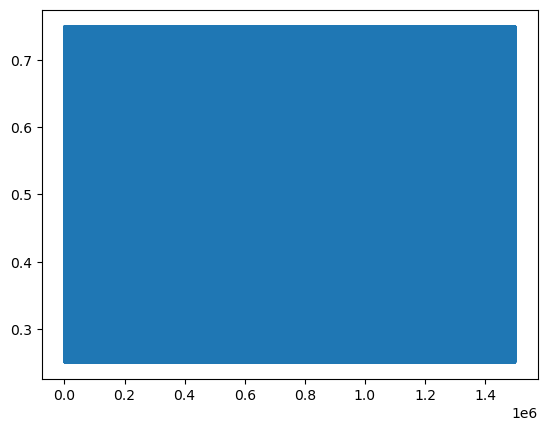

In [138]:
plt.plot(targets)

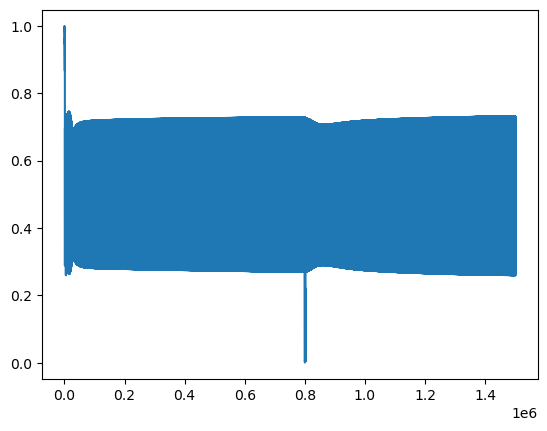

In [139]:
plt.plot(outputs)

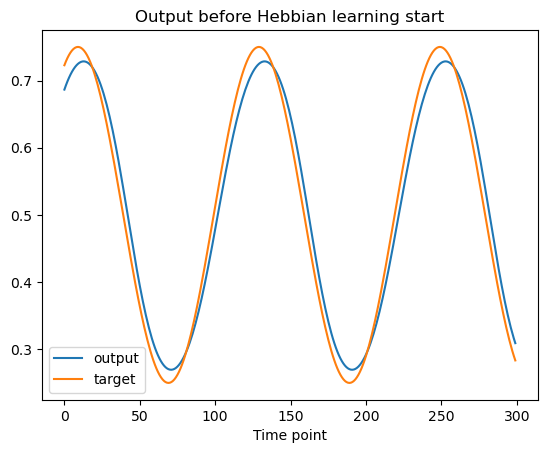

In [157]:
plt.plot(outputs[800000-300:800000], label='output')
plt.plot(targets[800000-300:800000], label='target')
plt.legend()
plt.title('Output before Hebbian learning start')
plt.xlabel('Time point')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_SGDoutput.png')

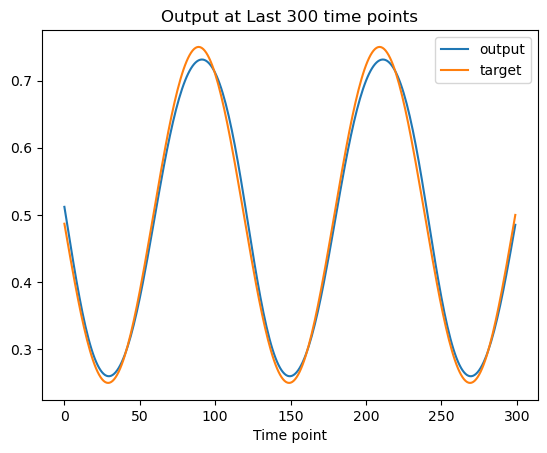

In [187]:
plt.plot(outputs[-300:], label='output')
plt.plot(targets[-300:], label='target')
plt.legend()
plt.title('Output at Last 300 time points')
plt.xlabel('Time point')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_lastoutput.png')

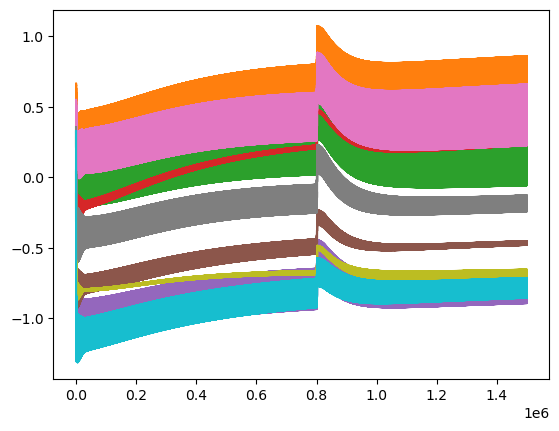

In [142]:
all_states = np.concatenate(states, axis=1)
for i in range(10):
    plt.plot(all_states[i, :])

(0.0, 0.5)

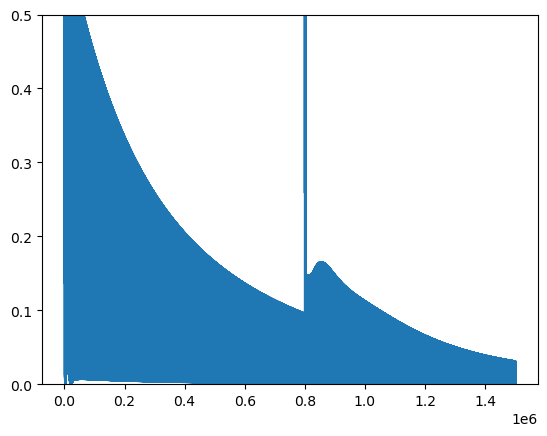

In [159]:
plt.plot(losses)
plt.ylim([0, 0.5])

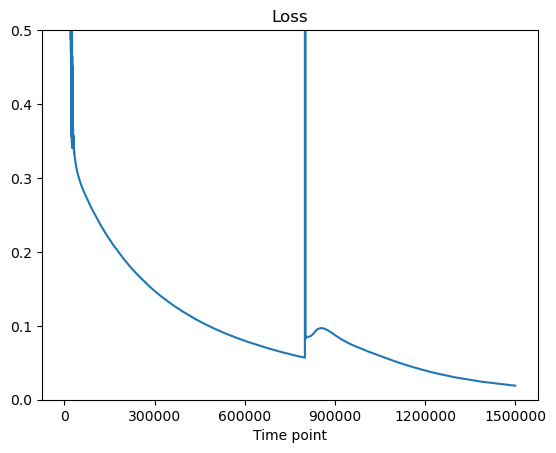

In [181]:
# get the average loss for every 120 time points
avg_losses = []
for i in range(len(losses)//120):
    avg_losses.append(np.mean(losses[i*120:(i+1)*120]))
plt.plot(avg_losses)
plt.ylim([0, 0.5])
plt.xticks(np.arange(0, 1500000//120+1, 2500), np.arange(0, 1500000+1, 2500*120))
plt.xlabel('Time point')
plt.title('Loss')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_loss.png')

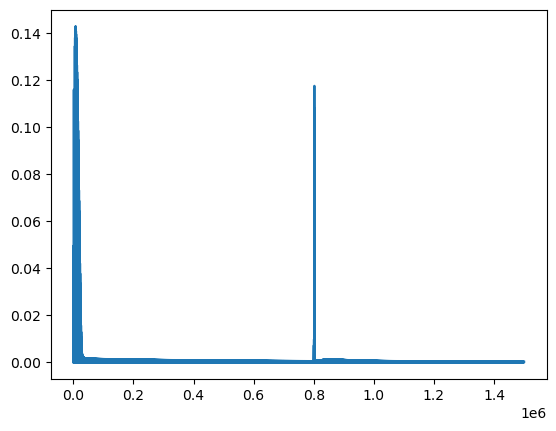

In [144]:
plt.plot(gain_changes)

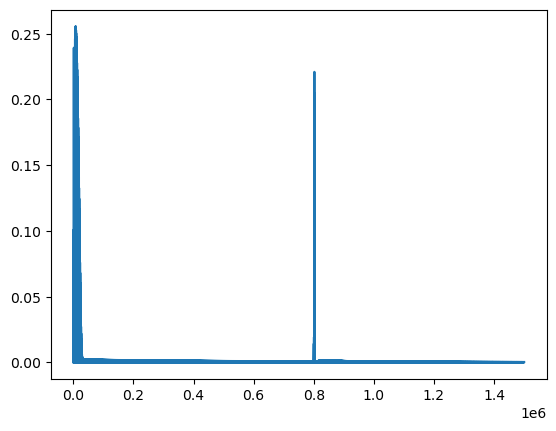

In [145]:
plt.plot(shift_changes)

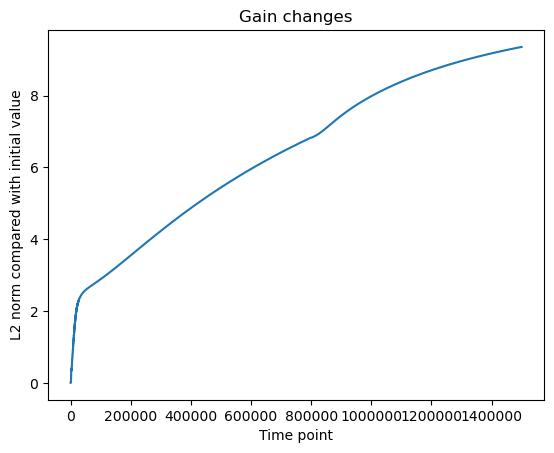

In [164]:
fig, ax = plt.subplots()
plt.plot(gain_theo_changes)
plt.xlabel('Time point')
plt.ylabel('L2 norm compared with initial value')
plt.title('Gain changes')
ax.ticklabel_format(useOffset=False, style='plain')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_theogc.png')

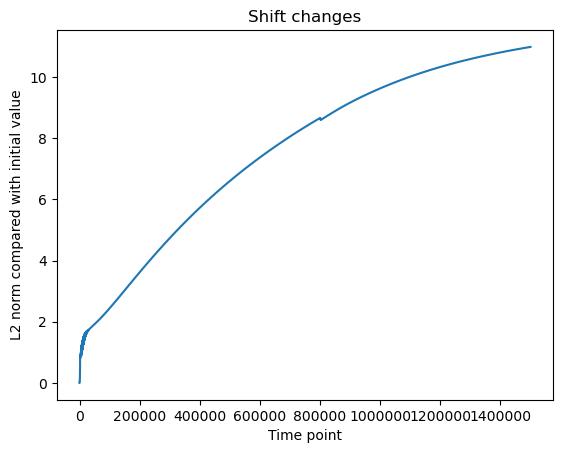

In [165]:
fig, ax = plt.subplots()
plt.plot(shift_theo_changes)
plt.xlabel('Time point')
plt.ylabel('L2 norm compared with initial value')
plt.title('Shift changes')
ax.ticklabel_format(useOffset=False, style='plain')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_theosc.png')

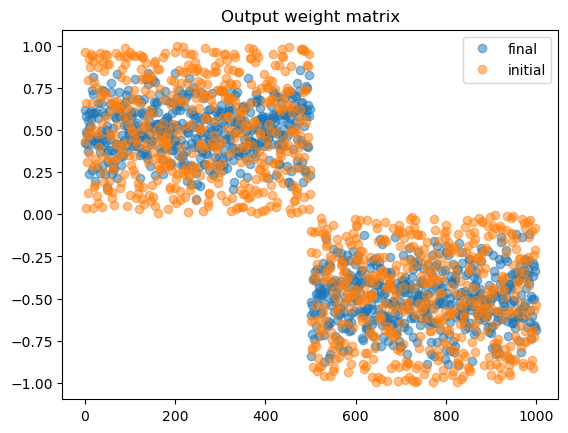

In [168]:
plt.plot(this_output_weight_matrix.flatten(), 'o', alpha=0.5, label='final')
plt.plot(init_output_weight_matrix.flatten(), 'o', alpha=0.5, label='initial')
plt.legend()
plt.title('Output weight matrix')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_outweight.png')

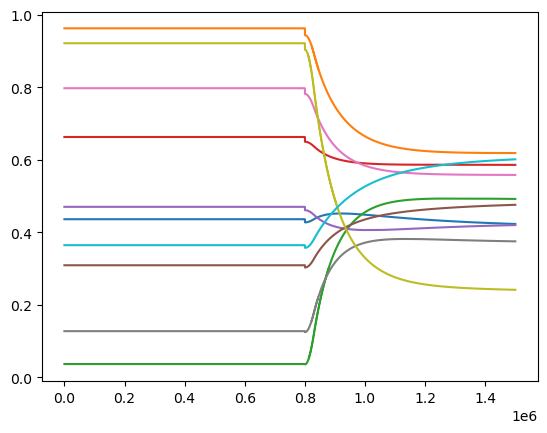

In [149]:
all_output_weights = np.concatenate(output_weights, axis=0).T
for i in range(10):
    plt.plot(all_output_weights[i, :])

In [150]:
network = RNN(weight_matrix, connectivity_matrix, init_state, theo_gain, theo_shift, this_output_weight_matrix, feedback_weight_matrix, 
        timestep=0.1, g=1.5, activation_func=nn.Sigmoid(), output_nonlinearity=nn.Sigmoid(), shiftout=-2.5, gainout=1.15, target=targets)
states_nogain, activations_nogain, outputs_nogain = network.simulate(120)

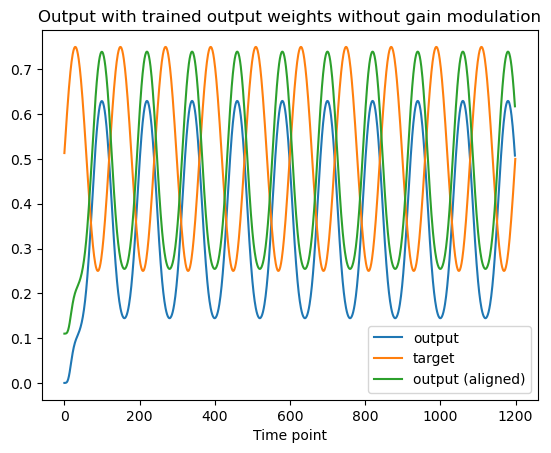

In [185]:
plt.plot(np.array(outputs_nogain), label='output')
plt.plot(targets[0:1200], label='target')
plt.plot(np.array(outputs_nogain)+0.11, label='output (aligned)')
plt.xlabel('Time point')
plt.legend()
plt.title('Output with trained output weights without gain modulation')
if SAVEFIG:
    plt.savefig('fig/FORCE_fbtargethebb_nogainoutput.png')